## Which hypothesis is true? 

### 1. Using the sampling distribution & C.I. 
#### : We simulate sampling distribution of our statistics, then we could see if our hypothesis is consistent with what we observe in the sampling distribution....In other words, simply look at if the interval falls in the null hypothesis space or in the alternative hypothesis space.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)
 
coffee_full = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L4/data/coffee_dataset.csv')

#We assume this sample is all we have.
coffee_red = coffee_full.sample(200)

### Q. The average height for all coffee drinkers > 70 inches ? 

$$H_0: \mu \leq 70$$
$$H_1: \mu > 70$$

In [2]:
#Bootstrap a sample data and compute the sample mean again and again...
# Watch out! we r only interested in 'height' !!!! not all data! 

mu_pool = []

for i in range(10000):
    bootsamp = coffee_red.sample(200, replace=True)
    mu_pool.append(bootsamp.query('drinks_coffee==True')['height'].mean())

In [ ]:
# Compute the C.I.
lower, upper = np.percentile(mu_pool, 2.5), np.percentile(mu_pool, 97.5)

In [ ]:
# Our interval was entirely below 70, which would suggest the null (the population mean is less than 70) is actually rejected.
plt.hist(mu_pool);
plt.axvline(x=lower, color='r', linewidth=2);
plt.axvline(x=upper, color='r', linewidth=2);

### 2. Simulating From the Null Hypothesis
#### : Simulating what we believe to be a possible under the H0, then seeing if our data in reality is consistent with that.

In [3]:
#We assume this sample is all we have.
coffee_red = coffee_full.sample(200)

In [8]:
# sample mean in reality 
sample_mean = coffee_red.query('drinks_coffee==True')['height'].mean()

In [4]:
# We assume the Null is true! Then what the sampling distribution would look like if we were to simulate from the closest value 
#under the Null to the Alternative...'70' 

# In this case, we simulate from a Normal Distribution because by the central limit theorem, "bootsamp['height'].mean()" - 
# the hypothesized mean at 70 and the SD of our sampling distribution would follow it. 

# First, Get the SD
mu_pool = []

for i in range(10000):
    bootsamp = coffee_red.sample(200, replace=True)
    mu_pool.append(bootsamp.query('drinks_coffee==True')['height'].mean())

    
        
np.std(mu_pool)

0.25384693489487814

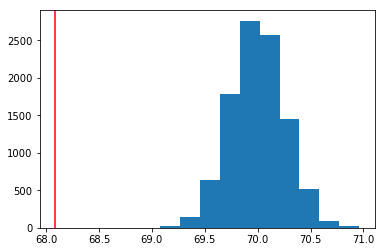

In [9]:
# 10,000 Sampling from ~ N(mu, SD, size)
null_vals = np.random.normal(70, np.std(mu_pool), 10000)
plt.hist(null_vals)
plt.axvline(sample_mean, color='r')

# Now we can ask a question "where the sample mean falls in this distribution?" 
# With our sample mean so far out in the tail, it's far enough that we don't think it probably came from this Null hypothesized 
#value. 

In [10]:
# P-value (..and.. >, <... follows H1?) 
(null_vals > coffee_red.query('drinks_coffee==True')['height'].mean()).mean() 

# The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) 
#if the null hypothesis is accepted...ie the area that is created by the t-statistics of the data.


1.0

### What if

$$H_0: \mu \geq 70$$
$$H_1: \mu < 70$$

In [11]:
# P-value (..and.. >, <... follows H1?) 

(null_vals < coffee_red.query('drinks_coffee==True')['height'].mean()).mean() 

0.0

### What if 

$$H_0: \mu = 70$$
$$H_1: \mu \neq 70$$

In [12]:
# P-value (..and.. >, <... follows H1?) 

null_mean=70

(null_vals < coffee_red.query('drinks_coffee==True')['height'].mean()).mean() + (null_vals > null_mean + (null_mean-sample_mean)).mean()

0.0

### 3. Simulating From the Null Hypothesis (practice)
#### : Simulating what we believe to be a possible under the H0, then seeing if our data is consistent with that.

### Q. The average height for coffee drinkers is smaller than non-coffee drinkers ?

`1>.` If you were interested in if the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative be?  

**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

$$H_0: \mu_{yes} - \mu_{no} = 0$$


$$H_1: \mu_{yes} - \mu_{no} \neq 0$$


**$\mu_{yes}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`2>.` If you were interested in if the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative be? 

**In this case, there is a question associated with a direction - that is the average height for coffee drinkers is less than non-coffee drinkers.  Below is one of the ways you could write the null and alternative.  Since the mean for coffee drinkers is listed first here, the alternative would suggest that this is negative.**

$$H_0: \mu_{yes} - \mu_{no} \geq 0$$


$$H_1: \mu_{yes} - \mu_{no} < 0$$


**$\mu_{yes}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`3>.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  

In [ ]:
nocoff_means, coff_means, diffs = [], [], []

for i in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    # append the info 
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean - nocoff_mean)   

In [ ]:
np.std(nocoff_means), np.std(coff_means), np.std(diffs)

In [ ]:
plt.hist(nocoff_means, alpha = 0.5);
plt.hist(coff_means, alpha = 0.5); # They look pretty normal to me!

In [ ]:
plt.hist(diffs, alpha = 0.5); # again normal - this is by the central limit theorem

`4>.` Now, use your sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect if your sampling distribution were centered on zero.  Also, calculate the observed sample mean difference in `sample_data`. 

** We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.**

In [ ]:
plt.hist(diffs, alpha = 0.5); # again normal - this is by the central limit theorem

In [ ]:
plt.hist(null_vals); #Here is the sampling distribution of the difference under the null